In [1]:
! pip install seaborn

In [2]:
import pandas as pd
import sys
sys.path.append('../src')
from functions import *

df_clients_profile = pd.read_csv('../Data/raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/raw/df_final_experiment_clients.txt')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

In [3]:
#lenght of the dataframes
lenght_clients_profile = print(df_clients_profile.shape)
lenght_experiment_clients = print(df_experiment_clients.shape)
lengt_web_data = print(df_web_data.shape)

(70609, 9)
(70609, 2)
(755405, 5)


In [4]:
#clean df
df_clients_profile = print_clean_data(df_clients_profile)

Before
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
------------------------------------------
------------------------------------------
After
client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


In [5]:
#clean df
df_experiment_clients = print_clean_data(df_experiment_clients)

Before
client_id        0
Variation    20109
dtype: int64
------------------------------------------
To many NaN values in column: Variation
------------------------------------------
After
client_id        0
Variation    20109
dtype: int64


In [6]:
#clean df
df_web_data = print_clean_data(df_web_data)

Before
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
------------------------------------------
------------------------------------------
After
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [7]:
df_null_experiment_clients = df_experiment_clients.isna()
df_null_experiment_clients

,client_id,Variation
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
70604,False,True
70605,False,True
70606,False,True
70607,False,True


In [8]:
df_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
#setting aside the clients that wont be part if the experiment
null_df_experiment_clients = df_experiment_clients[df_experiment_clients['Variation'].isnull()]
null_df_experiment_clients

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [10]:
#id of clients that are part of the test
df_experiment_clients_Test = df_experiment_clients[df_experiment_clients['Variation'] == 'Test']
df_experiment_clients_Test.head(10)

,client_id,Variation
0,9988021,Test
1,8320017,Test
3,1982004,Test
5,9466803,Test
6,3170143,Test
8,5887227,Test
10,438567,Test
11,2519971,Test
13,5407849,Test
16,5308474,Test


In [11]:
final_df_Test = pd.merge(df_experiment_clients_Test, df_clients_profile, on='client_id', how='inner')
final_df_Test = pd.merge(df_web_data, final_df_Test, on='client_id', how='inner')
df_test = final_df_Test
df_test.to_csv('df_test.csv', index=False)
#change the data type to datetime
df_test['date_time'] = pd.to_datetime(df_test['date_time']) 
df_test.head(5)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0


In [12]:
df_experiment_clients_Control = df_experiment_clients[df_experiment_clients['Variation'] == 'Control']
final_df_Control = pd.merge(df_experiment_clients_Control, df_clients_profile, on='client_id', how='inner')
final_df_Control = pd.merge(df_web_data, final_df_Control, on='client_id', how='inner')
df_control = final_df_Control
df_control.to_csv('df_control.csv', index=False)
#change the data type to datetime
df_control['date_time'] = pd.to_datetime(df_control['date_time']) 
df_control.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


# Day 1 & 2 (Week 5)

Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?


In [13]:
# Displaying the data types of each column in the dataframe
df_test.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [14]:
# Displaying the data types of each column in the dataframe
df_control.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr             float64
clnt_tenure_mnth           float64
clnt_age                   float64
gendr                       object
num_accts                  float64
bal                        float64
calls_6_mnth               float64
logons_6_mnth              float64
dtype: object

In [15]:
# Retrieving the unique data types present in the df_test
list(set(df_test.dtypes.tolist()))

[dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O')]

In [16]:
# Retrieving the unique data types present in the df_control
list(set(df_control.dtypes.tolist()))

[dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O')]

In [17]:
# Extracting column names with numerical data types from the dataframe
df_test.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [18]:
# Counting and sorting the unique values for each numerical column in descending order
df_test.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           26961
bal                 26907
clnt_tenure_mnth      444
clnt_age              157
clnt_tenure_yr         49
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [19]:
# Extracting column names with numerical data types from the dataframe
df_control.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [20]:
# Counting and sorting the unique values for each numerical column in descending order
df_control.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           23526
bal                 23488
clnt_tenure_mnth      443
clnt_age              155
clnt_tenure_yr         52
calls_6_mnth            7
logons_6_mnth           7
num_accts               6
dtype: int64

In [21]:
df_control.head(10).sort_index()

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
5,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
6,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
7,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
8,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
9,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0


In [22]:


import pandas as pd

# ... (Your code to read the data into df_control) ...

# 1. Data Preparation:
df_control['date_time'] = pd.to_datetime(df_control['date_time'])
df_control['date'] = df_control['date_time'].dt.date

# 2. Calculate time differences per step and make them positive:
# We need to sort the dataframe before calculating the time difference
df_control = df_control.sort_values(by=['visit_id', 'client_id', 'date_time'])

df_control['next_date_time'] = df_control.groupby(['visit_id', 'client_id'])['date_time'].shift(-1)


# Calculate time spent in seconds, but make sure it's always positive
df_control['time_diff_seconds'] = (df_control['next_date_time'] - df_control['date_time']).dt.total_seconds().abs()
df_control['time_diff_minutes'] = df_control['time_diff_seconds'] / 60

# 3. Pivot to Create Step Columns:
df_pivot = df_control.pivot_table(index=['client_id', 'visitor_id', 'visit_id'], columns='process_step', values='time_diff_minutes', fill_value=0)
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Remove the 'process_step' header

# 4. Rename Columns & Calculate Total Time:
df_pivot = df_pivot.rename(columns={'confirm': 'confirm_time', 'start': 'start_time', 'step_1': 'step_1', 'step_2': 'step_2', 'step_3': 'step_3'})

df_pivot['total_time_visit'] = df_pivot[['start_time', 'step_1', 'step_2', 'step_3', 'confirm_time']].sum(axis=1)


# 5. Merge with Original Data and Select/Reorder Columns:
final_df = pd.merge(df_pivot, df_control[['client_id', 'visit_id','Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'process_step']], on=['client_id', 'visit_id'], how='left')

final_df = final_df.drop_duplicates()

#Reorder to desired column order
final_df = final_df[['client_id', 'visitor_id', 'visit_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time',
       'step_1', 'step_2', 'step_3', 'confirm_time','total_time_visit', 'process_step']]


# Get last step per visit_id
final_df['last_step'] = final_df.groupby('visit_id')['process_step'].transform('last')
final_df = final_df.drop(columns=['process_step'])

df_control_final = final_df.drop_duplicates()


In [23]:
df_control_final.head(10).sort_index()


,client_id,visitor_id,visit_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,start_time,step_1,step_2,step_3,confirm_time,total_time_visit,last_step
0,1028,42237450_62128060588,557292053_87239438319_391157,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0,2017-04-08,0.816667,0.391667,2.366667,1.850000,0.0,5.425000,step_3
9,1186,446844663_31615102958,795373564_99931517312_810896,Control,8.0,99.0,22.0,U,2.0,31662.52,0.0,3.0,2017-04-08,0.183333,0.183333,0.000000,0.000000,0.0,0.366667,step_2
12,1195,766842522_69992551638,393817425_39015278493_996341,Control,21.0,262.0,54.5,M,2.0,28457.96,2.0,5.0,2017-04-05,0.550000,1.633333,0.516667,1.383333,0.0,4.083333,confirm
17,1197,753759429_54481946928,71862471_21202285428_848395,Control,7.0,85.0,28.5,U,5.0,177062.14,5.0,8.0,2017-04-01,0.066667,0.100000,0.475000,0.233333,0.0,0.875000,confirm
24,3647,742136411_92170694666,53540785_76819002881_890663,Control,15.0,190.0,63.0,F,2.0,154244.15,4.0,7.0,2017-06-01,0.233333,1.766667,7.566667,3.833333,0.0,13.400000,step_3
29,3743,179439784_83920302761,438930656_9173628148_961548,Control,6.0,75.0,30.0,U,3.0,48262.21,3.0,6.0,2017-06-16,0.216667,0.650000,2.350000,1.650000,0.0,4.866667,confirm
34,5354,233679354_36495397627,192604721_14077630095_819213,Control,4.0,58.0,50.5,U,2.0,62282.38,2.0,5.0,2017-04-12,0.216667,0.133333,0.283333,0.866667,0.0,1.500000,confirm
39,5354,233679354_36495397627,216367358_55024634523_791141,Control,4.0,58.0,50.5,U,2.0,62282.38,2.0,5.0,2017-04-13,0.100000,0.000000,0.000000,0.000000,0.0,0.100000,step_1
41,6642,378857471_644475492,261034804_26267268728_251909,Control,12.0,149.0,35.5,M,2.0,34987.23,0.0,3.0,2017-04-19,0.183333,0.550000,1.400000,5.250000,0.0,7.383333,confirm
46,6977,792636892_70609946663,613260866_97547229511_110040,Control,4.0,57.0,53.0,U,2.0,26011.36,0.0,3.0,2017-05-08,0.250000,0.083333,1.066667,2.133333,0.0,3.533333,confirm


In [24]:
df_control_final.columns

Index(['client_id', 'visitor_id', 'visit_id', 'Variation', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'date', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit', 'last_step'],
      dtype='object')

In [25]:

def basic_statistics(df: pd.DataFrame, columns):
    statistics = {}  # Dictionary to store statistics for each column

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
            # central tendency
            median = df[column].median()
            mode = df[column].mode().iloc[0]  # Get first mode if there are multiple
            mean = df[column].mean()

            # dispersion
            std_dev = df[column].std()
            variance = df[column].var()
            range_value = df[column].max() - df[column].min()  # Use range_value to avoid overwriting built-in range
            quantiles = df[column].quantile([0.25, 0.5, 0.75])  # Calculate 25th, 50th, 75th percentiles
            inter_QR = quantiles[0.75] - quantiles[0.25]

            # shape
            skewness = df[column].skew()
            kurtosis = df[column].kurtosis()

            statistics[column] = {
                'median': median,
                'mode': mode,
                'mean': mean,
                'std_dev': std_dev,
                'variance': variance,
                'range': range_value,
                '25th_percentile': quantiles[0.25],
                'median': quantiles[0.5],
                '75th_percentile': quantiles[0.75],
                'IQR': inter_QR,
                'skewness': skewness,
                'kurtosis': kurtosis
            }
        else:
            statistics[column] = 'Non-numeric column'  # Add a message for non-numeric columns
    
    #create new dataframe
    df_statistics = pd.DataFrame.from_dict(statistics)

    return df_statistics.transpose() #transpose to have columns as the variables

In [26]:
numerical_columns = ['clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal',
       'calls_6_mnth', 'logons_6_mnth', 'start_time', 'step_1',
       'step_2', 'step_3', 'confirm_time', 'total_time_visit']
basic_statistics(df_control_final, numerical_columns)

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
clnt_tenure_yr,11.000000,6.00,12.293427,7.011769,4.916491e+01,5.300000e+01,6.000000,16.000000,10.000000,0.987710,0.843964
clnt_tenure_mnth,140.000000,58.00,153.504669,83.769015,7.017248e+03,6.360000e+02,82.000000,194.000000,112.000000,1.001950,0.874382
clnt_age,50.000000,58.50,48.465633,15.727455,2.473528e+02,7.900000e+01,34.500000,61.000000,26.500000,0.016316,-0.932492
num_accts,2.000000,2.00,2.278309,0.559454,3.129886e-01,5.000000e+00,2.000000,2.000000,0.000000,2.208804,5.567949
bal,69675.950000,53955.97,161664.864545,309225.356904,9.562032e+10,7.718204e+06,41355.795000,152793.542500,111437.747500,7.839949,101.758823
calls_6_mnth,3.000000,6.00,3.295835,2.188931,4.791420e+00,6.000000e+00,1.000000,6.000000,5.000000,-0.084851,-1.445679
logons_6_mnth,6.000000,9.00,6.332111,2.176251,4.736069e+00,6.000000e+00,4.000000,9.000000,5.000000,-0.104257,-1.433671
start_time,0.350000,0.00,0.825721,2.029066,4.117109e+00,9.989762e+01,0.157639,0.766667,0.609028,16.959291,629.165740
step_1,0.233333,0.00,0.597624,1.567776,2.457922e+00,6.333333e+01,0.083333,0.650000,0.566667,15.859409,429.677734
step_2,0.783333,0.00,1.140737,2.714930,7.370846e+00,3.627167e+02,0.000000,1.533333,1.533333,88.956177,11676.666745


In [27]:
steps = ['step_1','step_2', 'step_3', 'confirm_time', 'total_time_visit']
df_steps = pd.DataFrame(basic_statistics(df_control_final,steps))

In [28]:
df_steps

,median,mode,mean,std_dev,variance,range,25th_percentile,75th_percentile,IQR,skewness,kurtosis
step_1,0.233333,0.0,0.597624,1.567776,2.457922,63.333333,0.083333,0.650000,0.566667,15.859409,429.677734
step_2,0.783333,0.0,1.140737,2.714930,7.370846,362.716667,0.000000,1.533333,1.533333,88.956177,11676.666745
step_3,0.633333,0.0,1.411173,2.726580,7.434240,102.733333,0.000000,1.633333,1.633333,7.513377,134.929644
confirm_time,0.000000,0.0,0.150702,1.706289,2.911423,156.600000,0.000000,0.000000,0.000000,39.569848,2849.704963
total_time_visit,2.883333,0.0,4.125956,5.351321,28.636639,369.430556,1.285833,5.216667,3.930833,15.938924,860.138957


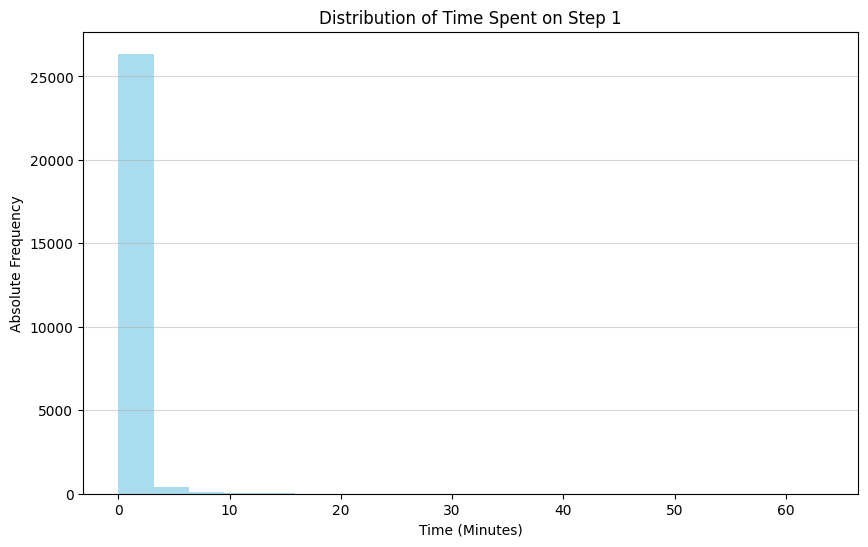

In [35]:
import matplotlib.pyplot as plt

# Extract data for step_1
step_1_times = df_control_final['step_1']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(step_1_times, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Time Spent on Step 1')
plt.xlabel('Time (Minutes)')
plt.ylabel('Absolute Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

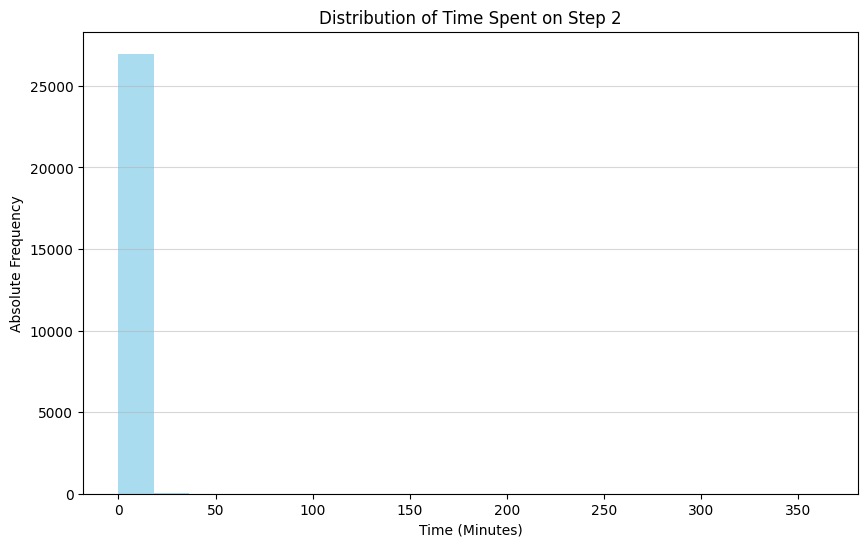

In [36]:
import matplotlib.pyplot as plt

# Extract data for step_1
step_2_times = df_control_final['step_2']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(step_2_times, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Time Spent on Step 2')
plt.xlabel('Time (Minutes)')
plt.ylabel('Absolute Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()